In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

# Example usage:
# evaluate_model(perceptron, X_train, X_test, y_train, y_test)

In [22]:
train_df = pd.read_csv("train10k.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Columns: 1615 entries, name to mZagreb2
dtypes: float64(1279), int64(335), object(1)
memory usage: 118.3+ MB


In [23]:
train_df.shape

(9602, 1615)

In [24]:
train_df.head()

,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C1=CC=C(C=C1)N(C2=CC=CC=C2)C(=O)N3C=CN=N3,1,NaN,NaN,0,0,26.738640,2.408266,4.798534,26.738640,...,9.775938,66.510483,264.101111,8.253160,764.0,28,102,119,5.055556,4.527778
1,C1COCCN1C(=O)N2C=CN=N2,1,NaN,NaN,0,0,17.305419,2.317107,4.585026,17.305419,...,9.184920,56.970810,182.080376,7.916538,247.0,15,64,73,3.583333,2.972222
2,C1CCN(C1)C(=O)N2N=CC(=N2)C3=CC=C(C=C3)C4=CC=CC=C4,1,NaN,NaN,0,0,32.588813,2.408273,4.741441,32.588813,...,10.003559,73.928484,318.148061,7.574954,1509.0,34,128,151,5.777778,5.277778
3,COC1=CC2=C(C=C1)C=C(C=C2)C3=NN(N=C3)C(=O)N4CCCC4,1,NaN,NaN,0,0,32.315833,2.434854,4.827387,32.315833,...,10.098849,74.146649,322.142976,7.670071,1453.0,36,130,155,6.388889,5.277778
4,CC(C)(CCC1(C(CCC2=C1N=C3C(=C2OC)C=CO3)O)OC)O,1,NaN,NaN,0,0,29.954829,2.574554,5.129759,29.954829,...,10.424749,72.979657,335.173273,6.840271,1176.0,44,132,161,9.291667,5.236111


filling NaN with zero

In [25]:
train_df = train_df.fillna(0)

removing 'name' column

In [26]:
train_df = train_df.drop('name', axis=1)

In [27]:
train_df.isna().sum()

cls         0
ABC         0
ABCGG       0
nAcid       0
nBase       0
           ..
WPol        0
Zagreb1     0
Zagreb2     0
mZagreb1    0
mZagreb2    0
Length: 1614, dtype: int64

 X_train: Features for training
 
 X_test: Features for testing
 
 y_train: Labels for training
 
 y_test: Labels for testing

In [28]:
from sklearn.model_selection import train_test_split
Y = train_df[['cls']].copy()
X = train_df.drop(['cls'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Normalizing

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)


## RF Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)



K-Folding

In [32]:

from sklearn.model_selection import cross_val_score, KFold
import numpy as np


# Define the number of folds (k) and the cross-validation strategy
k = 10  # You can change this value as needed
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the accuracy scores
scores = cross_val_score(model, X_train_normalized, y_train.T.values[0], cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold and the mean score
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

mean_accuracy = np.mean(scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")


Fold 1: Accuracy = 0.8036
Fold 2: Accuracy = 0.7982
Fold 3: Accuracy = 0.8073
Fold 4: Accuracy = 0.8216
Fold 5: Accuracy = 0.8320
Fold 6: Accuracy = 0.8151
Fold 7: Accuracy = 0.8177
Fold 8: Accuracy = 0.8047
Fold 9: Accuracy = 0.8073
Fold 10: Accuracy = 0.8112
Mean Accuracy: 0.8119


Accuracy: 0.7287870900572618
Precision: 0.708941605839416
Recall: 0.7936670071501533
F1-Score: 0.7489156626506025
AUC-ROC: 0.7275129090952465
AUC-PR (Average Precision): 0.6678171284019122
Matthew's Correlation Coefficient (MCC): 0.4595371063314451
Log Loss: 9.7755041206299
Balanced Accuracy: 0.7275129090952465
Confusion Matrix:
[[623 319]
 [202 777]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       942
           1       0.71      0.79      0.75       979

    accuracy                           0.73      1921
   macro avg       0.73      0.73      0.73      1921
weighted avg       0.73      0.73      0.73      1921



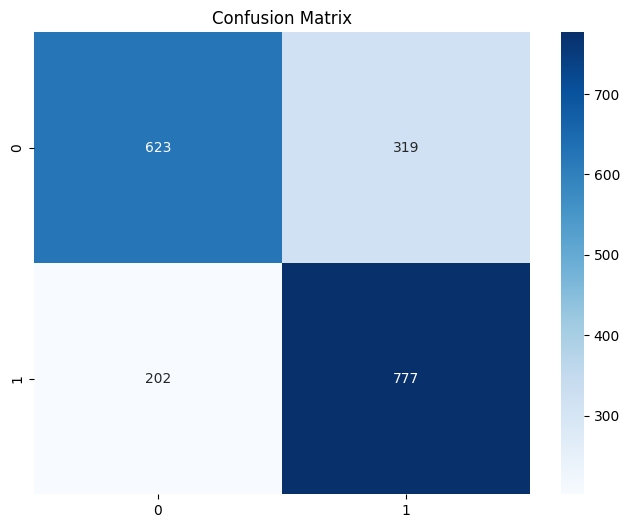

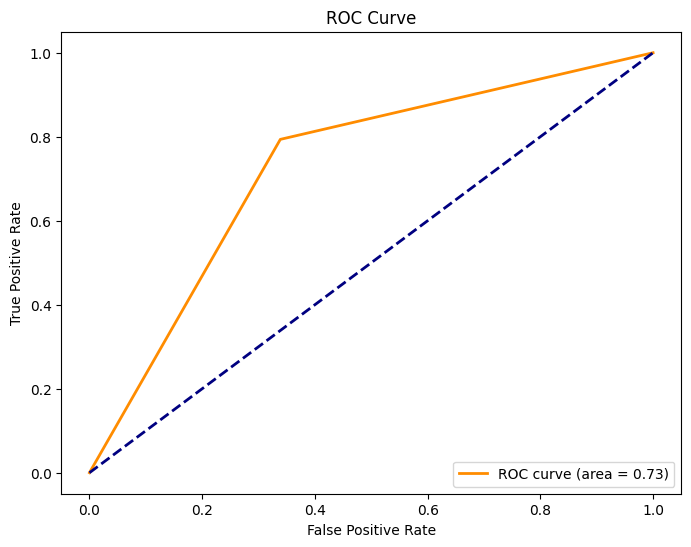

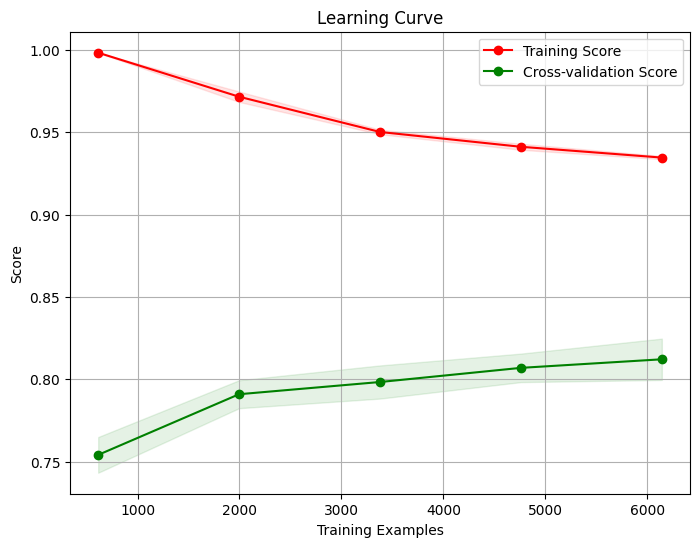

c:\Users\Ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [39]:
evaluate_model(model,X_train_normalized, X_test_normalized, y_train.T.values[0], y_test)


In [44]:
y_pred = model.predict(X_test_normalized)
y_pred


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

GridSearching

In [33]:
# from sklearn.model_selection import RandomizedSearchCV

In [34]:
# from scipy.stats import randint

# param_dist = {
#     'n_estimators': randint(10, 200),  # Random integer between 10 and 200
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20)
# }

In [35]:
# random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)


In [36]:
# random_search.fit(X_train_normalized, y_train)
# best_rf_classifier = random_search.best_estimator_
# best_params = random_search.best_params_

